<a href="https://colab.research.google.com/github/Aditya12kadam/Customer_Churn_Prediction/blob/main/Churn_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf



In [ ]:
df = pd.read_csv('churn_data.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




*   Surname : The Surname of the customer

*   CreditScore : The CreditScore of the customer

*   Geography : The country of the customer(Germany,France,Spain)

*   Gender : The gender of the customer(Male,Female)

*    Age : The age of the customer
*    Tenure : The customers number of years in the bank


*   Balance : The Account balance of the customer


*   NumOfProducts : The number of bank products that the customer uses


*    HasCrCard : Does the customer have a credit card?(0=No,1=Yes)



*   IsActiveMember : Does the customer have an active membership?(0=No,1=Yes)
*   EstimatedSalary : The estimated salary of the customer


*   Exited : Does the customer leave the bank?(0=No,1=Yes)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
#lets see statisticsl property of data frame
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


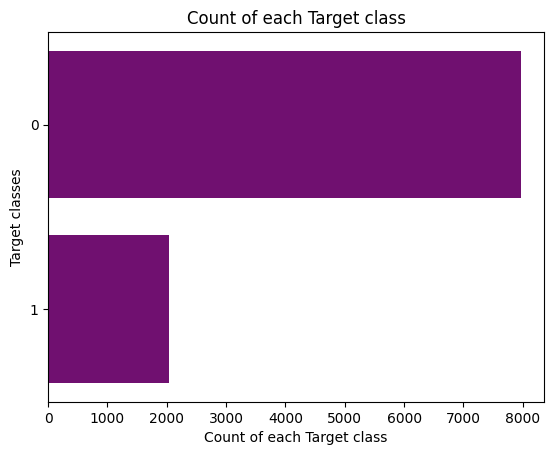

In [ ]:
sns.countplot(y=df.Exited ,data=df,color="purple")
plt.title("Count of each Target class")
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

##EDA

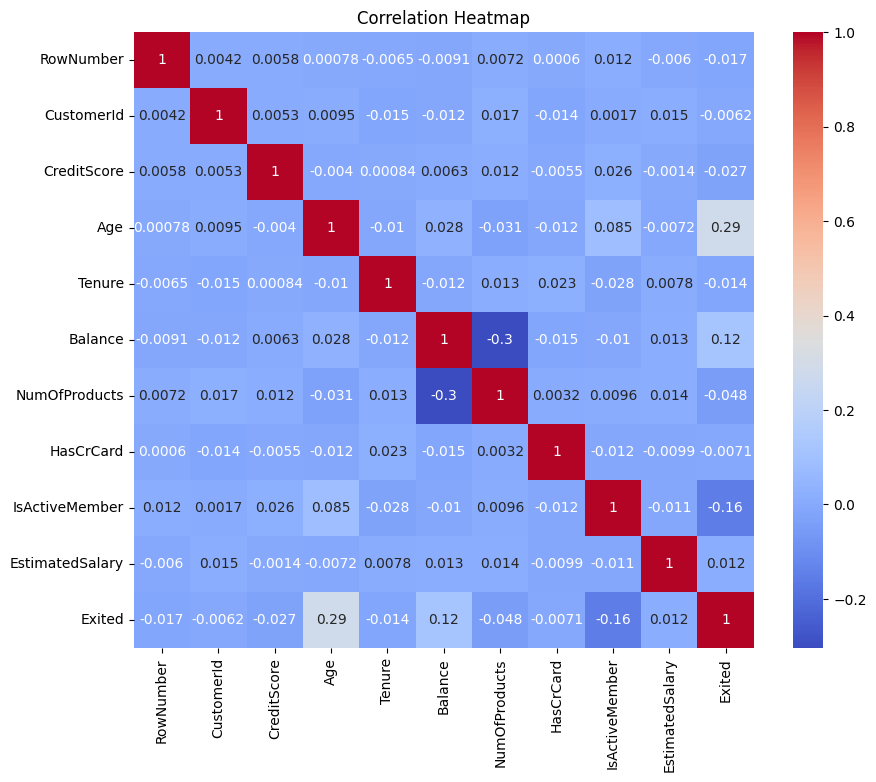

In [ ]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlations and generate heatmap
plt.figure(figsize=(10, 8))
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#####Here we can see  Age,Balance and Active_Membership are imp features.

In [ ]:
features = corr['Exited'].sort_values(ascending=False)[1:]
features

,Exited
Age,0.285323
Balance,0.118533
EstimatedSalary,0.012097
CustomerId,-0.006248
HasCrCard,-0.007138
Tenure,-0.014001
RowNumber,-0.016571
CreditScore,-0.027094
NumOfProducts,-0.047820
IsActiveMember,-0.156128


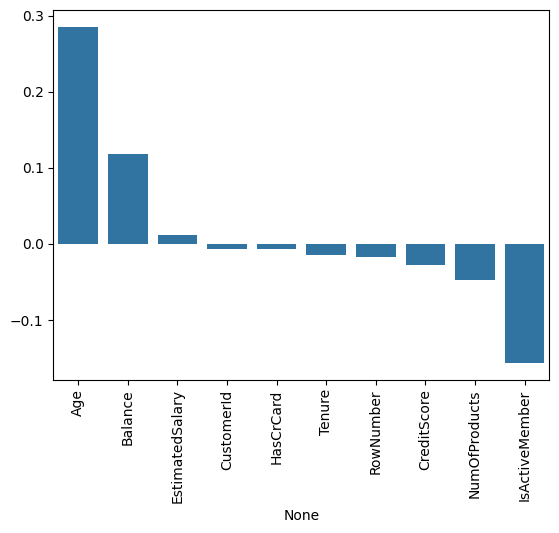

In [ ]:
#lets draw bar graph to see best features
sns.barplot(x=features.index, y=features.values)
plt.xticks(rotation=90)
plt.show()

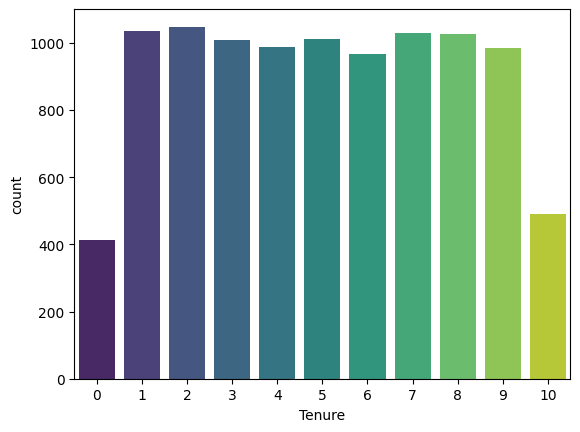

In [ ]:
# lets see tenure
sns.countplot(x='Tenure',data=df, palette="viridis")
plt.show()

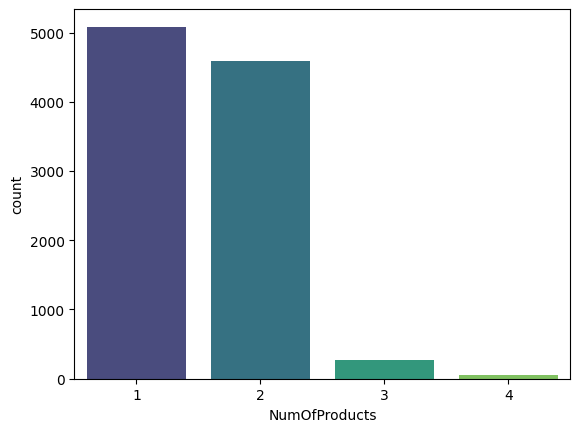

In [ ]:
# number of products
sns.countplot(x='NumOfProducts',data=df, palette="viridis")
plt.show()

In [ ]:
# from this we can say customers with four products have less chances of leaving

finding relations

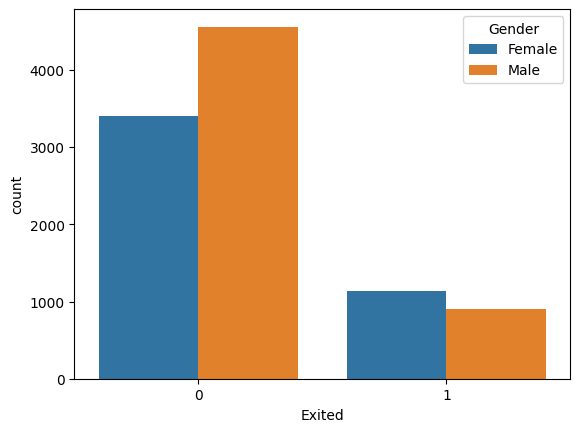

In [ ]:
sns.countplot(x="Exited",data=df,hue='Gender')
plt.show()

In [ ]:
# It seems that Females are leaving the bank more than male and males are likely to stay more in the bank

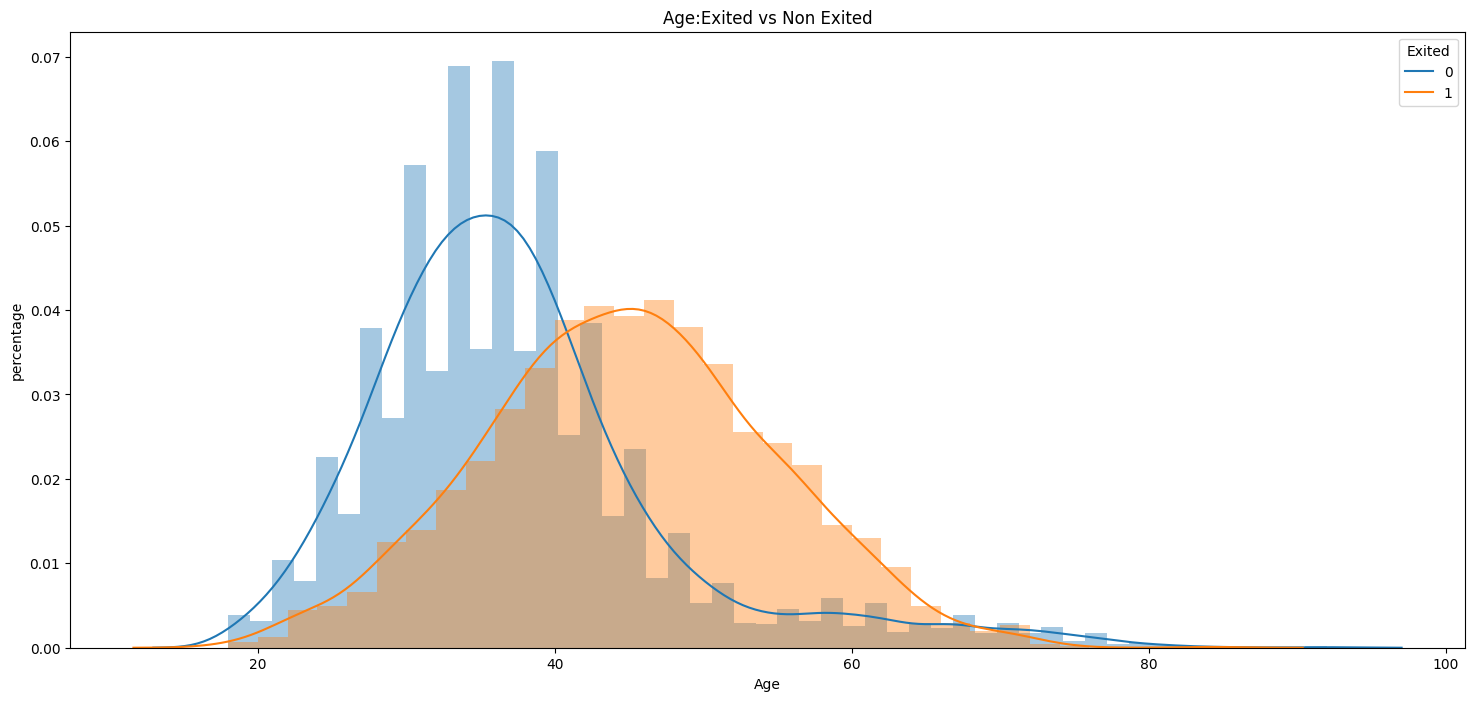

In [ ]:
Non_Exited = df[df['Exited']==0]
Exited = df[df['Exited']==1]

plt.subplots(figsize=(18,8))
sns.distplot(Non_Exited['Age'])
sns.distplot(Exited['Age'])
plt.title('Age:Exited vs Non Exited')
plt.legend([0,1],title='Exited')
plt.ylabel('percentage');

In [ ]:
#from this we can see that as age increases average tendancy of people leaving bank increases

### data preprocessing

In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#encoding and labelling the necessary columns
label=LabelEncoder()
scaler = StandardScaler()
df['Geography']=label.fit_transform(df['Geography'])
df['Gender']=label.fit_transform(df['Gender'])
df[['CreditScore','Balance','EstimatedSalary']]=scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


In [ ]:
df.groupby('IsActiveMember')['Exited'].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: count, dtype: int64

45% customers are inactive and have not exited from the organization. We can safely assume that these people either have forgotten about their account or else have kept their money in savings. The cause of concern is that 36% customers who were active in using the services have exited.

In [ ]:
target = df['Exited']
df.drop(columns=['Exited'], axis=1, inplace=True)



In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = ss.fit_transform(df)

In [ ]:
from imblearn.over_sampling import SMOTE
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=42)
data_res, target_res = sm.fit_resample(df, target)

##Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_res, target_res, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, roc_curve, classification_report,roc_auc_score
def evaluation(X_test, clf, y_test):
  y_pred = clf.predict(X_test)
  print('CLASSIFICATION REPORT')
  print(classification_report(y_test, y_pred))

  print('F1-Score')
  print(np.round(f1_score(y_test, y_pred)*100,2))

  print('Accuracy')
  accuracy = accuracy_score(y_test, y_pred)
  print(np.round(accuracy*100, 2), '%')

def plot_loss(model):
  prob=model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds=roc_curve(y_test, prob)
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  #plt.title('Logistic Regression ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  print('AUC-ROC')
  print(np.round(roc_auc_score(y_test, prob)*100,2))


##Model Fitting

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1590
           1       0.70      0.68      0.69      1596

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186

F1-Score
69.21
Accuracy
69.59 %
AUC-ROC
76.36


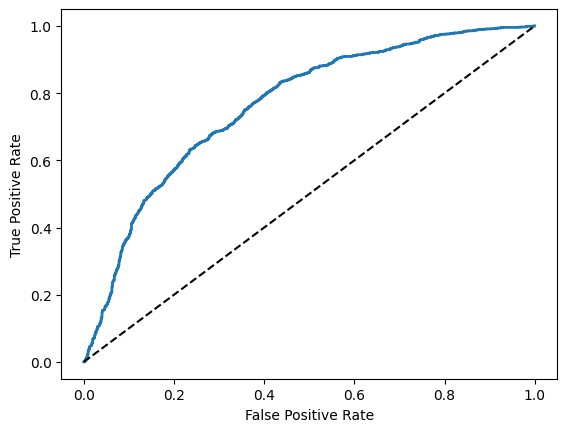

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
evaluation(X_test, lr, y_test)
plot_loss(lr)

We got an accuracy of 70% and auc roc score of 76.36 using Logistic Regression. Let's see if other algorithm gives us better results.

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1590
           1       0.83      0.86      0.85      1596

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

F1-Score
84.68
Accuracy
84.37 %
AUC-ROC
84.37


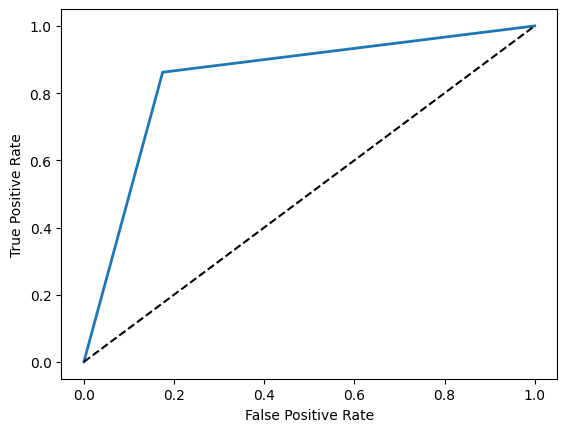

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
evaluation(X_test, dt, y_test)
plot_loss(dt)



Using Decision Tree Classifier we got an accuracy of and auc roc score of 84.27. This is a lot better than Logistic Regression


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1590
           1       0.80      0.80      0.80      1596

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

F1-Score
79.99
Accuracy
79.88 %
AUC-ROC
88.22


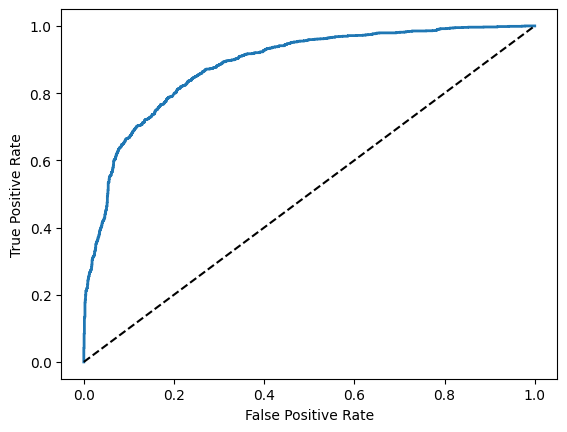

In [ ]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_train, y_train)
evaluation(X_test, svc_model, y_test)
plot_loss(svc_model)

Using SVC we got accuracy of 79.88% and roc-auc score of 82.22. This is better than Logistic Regression but Decison Tree is best amongst all three.

In [ ]:
# Importing the Keras libraries and packages
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 10))
# classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train.shape, y_train.shape

((12740, 10), (12740,))

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4774 - loss: 0.8105 - val_accuracy: 0.5077 - val_loss: 0.7139
Epoch 2/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5176 - loss: 0.6988 - val_accuracy: 0.5791 - val_loss: 0.6721
Epoch 3/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6258 - loss: 0.6582 - val_accuracy: 0.6614 - val_loss: 0.6397
Epoch 4/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6828 - loss: 0.6276 - val_accuracy: 0.7042 - val_loss: 0.6126
Epoch 5/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7090 - loss: 0.6020 - val_accuracy: 0.7265 - val_loss: 0.5908
Epoch 6/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7243 - loss: 0.5839 - val_accuracy: 0.7358 - val_loss: 0.5719
Epoch 7/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7385 - loss: 0.5654 - val_accuracy: 0.7413 - val_loss: 0.5577
Epoch 8/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7398 - loss: 0.5515 - val_accu

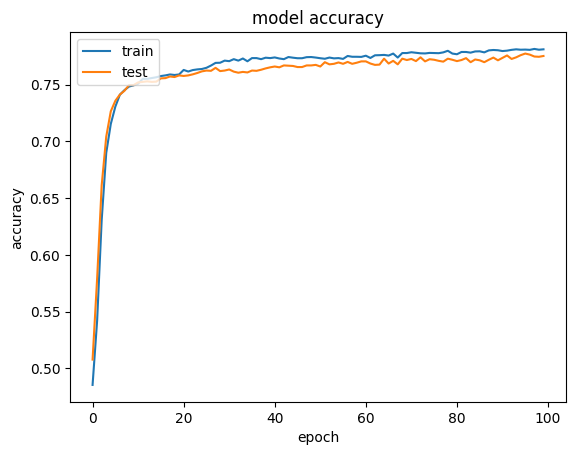

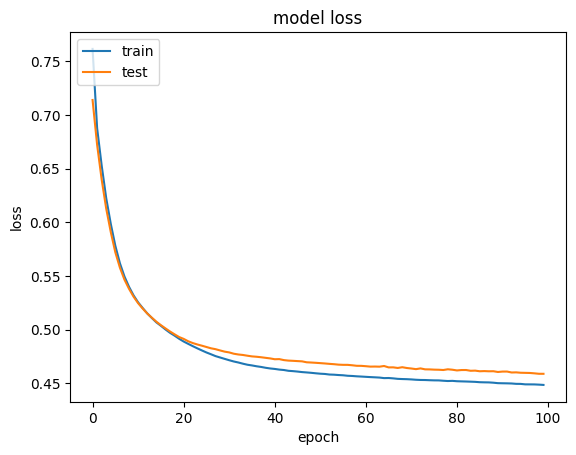

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
cm

array([[1225,  365],
       [ 363, 1233]])

In [ ]:
score

0.7715003138731952

##Conclusion

**DecisionTreeClassifier** gave the highest accuracy among all models